<a href="https://colab.research.google.com/github/rinogrego/Fundus-Eye-Project/blob/main/notebooks/RFMiD-Multi-Label-Fundus-Disease-Detection-using-Swin-Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from datetime import datetime

In [2]:
PROJECT_DIR = "/content/drive/MyDrive/DSC/Fundus/"
DATA_DIR = os.path.join(PROJECT_DIR, "Fundus")

In [3]:
train_zip = os.path.join(DATA_DIR, "Training_Set.zip")
val_zip = os.path.join(DATA_DIR, "Evaluation_Set.zip")
test_zip = os.path.join(DATA_DIR, "Test_Set.zip")

In [4]:
!echo $train_zip

/content/drive/MyDrive/DSC/Fundus/Fundus/Training_Set.zip


In [5]:
!pip install patool
from google.colab import output
output.clear()

## Data Acquisition

Datasets used
- [Retinal Fundus Multi-Disease Image Dataset (RFMiD): A Dataset for Multi-Disease Detection Research](https://www.mdpi.com/2306-5729/6/2/14)
- [Retinal Fundus Multi-Disease Image Dataset (RFMiD) 2.0: A Dataset of Frequently and Rarely Identified Diseases](https://www.mdpi.com/2306-5729/8/2/29)

In [9]:
import patoolib
from datetime import datetime

start = datetime.now()


patoolib.extract_archive(train_zip, outdir='/content/dataset/')
print("Unzip train finished\t\t:", (t1 := datetime.now()) - start)
print("="*100)
patoolib.extract_archive(val_zip, outdir='/content/dataset/')
print("Unzip val finished\t\t:", (t2 := datetime.now()) - t1)
print("="*100)
patoolib.extract_archive(test_zip, outdir='/content/dataset/')
print("Unzip test finished\t\t:", (t3 := datetime.now()) - t2)

INFO patool: Extracting /content/drive/MyDrive/DSC/Fundus/Fundus/Training_Set.zip ...
INFO:patool:Extracting /content/drive/MyDrive/DSC/Fundus/Fundus/Training_Set.zip ...
INFO patool: ... creating output directory `/content/dataset/'.
INFO:patool:... creating output directory `/content/dataset/'.
INFO patool: running /usr/bin/7z x -o/content/dataset/ -- /content/drive/MyDrive/DSC/Fundus/Fundus/Training_Set.zip
INFO:patool:running /usr/bin/7z x -o/content/dataset/ -- /content/drive/MyDrive/DSC/Fundus/Fundus/Training_Set.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/DSC/Fundus/Fundus/Training_Set.zip extracted to `/content/dataset/'.
INFO:patool:... /content/drive/MyDrive/DSC/Fundus/Fundus/Training_Set.zip extracted to `/content/dataset/'.
INFO patool: Extracting /content/drive/MyDrive/DSC/Fundus/Fundus/Evaluation_Set.zip ...
INFO:patool:Extracting /content/drive/MyDrive/DSC/Fundus/Fundus/Evaluation_Set.zip ...


Unzip train finished		: 0:01:14.836324


INFO patool: running /usr/bin/7z x -o/content/dataset/ -- /content/drive/MyDrive/DSC/Fundus/Fundus/Evaluation_Set.zip
INFO:patool:running /usr/bin/7z x -o/content/dataset/ -- /content/drive/MyDrive/DSC/Fundus/Fundus/Evaluation_Set.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/DSC/Fundus/Fundus/Evaluation_Set.zip extracted to `/content/dataset/'.
INFO:patool:... /content/drive/MyDrive/DSC/Fundus/Fundus/Evaluation_Set.zip extracted to `/content/dataset/'.
INFO patool: Extracting /content/drive/MyDrive/DSC/Fundus/Fundus/Test_Set.zip ...
INFO:patool:Extracting /content/drive/MyDrive/DSC/Fundus/Fundus/Test_Set.zip ...


Unzip val finished		: 0:00:25.486679


INFO patool: running /usr/bin/7z x -o/content/dataset/ -- /content/drive/MyDrive/DSC/Fundus/Fundus/Test_Set.zip
INFO:patool:running /usr/bin/7z x -o/content/dataset/ -- /content/drive/MyDrive/DSC/Fundus/Fundus/Test_Set.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/DSC/Fundus/Fundus/Test_Set.zip extracted to `/content/dataset/'.
INFO:patool:... /content/drive/MyDrive/DSC/Fundus/Fundus/Test_Set.zip extracted to `/content/dataset/'.


Unzip test finished		: 0:00:27.017551


## Exploratory Data Analysis

In [10]:
print("Training images\t\t:", len(os.listdir("/content/dataset/Training_Set/Training")))
print("Evaluation images\t:", len(os.listdir("/content/dataset/Evaluation_Set/Validation")))
print("Test images\t\t:", len(os.listdir("/content/dataset/Test_Set/Test")))

Training images		: 1920
Evaluation images	: 640
Test images		: 640


In [11]:
# check image format variations
image_files = os.listdir("/content/dataset/Training_Set/Training")
image_files += os.listdir("/content/dataset/Evaluation_Set/Validation")
image_files += os.listdir("/content/dataset/Test_Set/Test")
image_formats = [filename.split(".")[-1] for filename in image_files]
set(image_formats)

{'png'}

### Checking the CSV

In [12]:
import pandas as pd

pd.set_option('display.max_columns', None)
df_train = pd.read_csv("/content/dataset/Training_Set/RFMiD_Training_Labels.csv")
df_val = pd.read_csv("/content/dataset/Evaluation_Set/RFMiD_Validation_Labels.csv")
df_test = pd.read_csv("/content/dataset/Test_Set/RFMiD_Testing_Labels.csv")

In [13]:
df_train.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
print(df_train.columns)

Index(['ID', 'Disease_Risk', 'DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN',
       'ERM', 'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST',
       'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS',
       'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME', 'PTCR', 'CF',
       'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL'],
      dtype='object')


In [19]:
df_train[["Disease_Risk"]].value_counts()

Disease_Risk
1               1519
0                401
Name: count, dtype: int64

In [26]:
df_train.loc[:, "DR":]

,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1916,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Checking the Disease Frequencies

In [39]:
df_train.loc[:, "DR":].sum(axis=0).sort_values(ascending=False)

DR      376
MH      317
ODC     282
TSLN    186
DN      138
MYA     101
ARMD    100
BRVO     73
ODP      65
ODE      58
LS       47
RS       43
CSR      37
CRS      32
CRVO     28
RPEC     22
AION     17
AH       16
MS       15
EDN      15
ERM      14
RT       14
MHL      11
PT       11
TV        6
RP        6
ST        5
PTCR      5
CME       4
CF        3
CWS       3
MNF       3
TD        3
BRAO      2
PRH       2
CRAO      2
CB        1
VS        1
PLQ       1
MCA       1
VH        1
HPED      1
CL        1
ODPM      0
HR        0
dtype: int64

In [40]:
df_val.loc[:, "DR":].sum(axis=0).sort_values(ascending=False)

DR      132
MH      102
ODC      72
TSLN     65
DN       46
ARMD     38
MYA      34
ODP      26
BRVO     23
ODE      21
LS       17
RS       14
CSR      11
CRS      11
CRVO      8
ERM       7
RT        6
RPEC      6
MS        5
EDN       5
AION      5
AH        4
ST        4
MHL       3
CWS       3
VS        3
PT        2
RP        2
TV        2
BRAO      2
ODPM      2
TD        2
CRAO      2
CF        2
VH        2
PLQ       1
PRH       1
PTCR      1
CME       1
CB        0
HR        0
MNF       0
MCA       0
HPED      0
CL        0
dtype: int64

In [41]:
df_test.loc[:, "DR":].sum(axis=0).sort_values(ascending=False)

DR      124
MH      104
ODC      91
TSLN     53
DN       46
MYA      32
ARMD     31
ODP      24
BRVO     23
ODE      17
LS       15
RS       14
CSR      13
CRS      11
CRVO      9
MS        7
ERM       5
AH        5
RT        5
PT        4
AION      4
EDN       4
RPEC      4
TD        4
MHL       3
ST        2
RP        2
CWS       2
TV        2
CME       2
PRH       2
CB        1
HR        1
VH        1
CL        1
CF        1
MNF       0
PTCR      0
CRAO      0
ODPM      0
MCA       0
VS        0
BRAO      0
PLQ       0
HPED      0
dtype: int64

### Checking multi-label

In [44]:
# check multilabel
df_train[df_train.loc[:, "DR":].sum(axis=1) > 1]

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
3,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,1793,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1891,1892,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1901,1902,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1902,1903,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# check multilabel
df_val[df_val.loc[:, "DR":].sum(axis=1) > 1]

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,24,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,25,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,540,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
541,542,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
545,546,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
607,608,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# check multilabel
df_test[df_test.loc[:, "DR":].sum(axis=1) > 1]

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,613,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
629,630,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
631,632,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
632,633,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Get Columns less than X num. of samples

based on the number of samples in the training dataset

In [53]:
_temp_df = df_train.loc[:, "DR":].sum(axis=0).sort_values(ascending=False)
_temp_df[_temp_df > 10]

DR      376
MH      317
ODC     282
TSLN    186
DN      138
MYA     101
ARMD    100
BRVO     73
ODP      65
ODE      58
LS       47
RS       43
CSR      37
CRS      32
CRVO     28
RPEC     22
AION     17
AH       16
MS       15
EDN      15
ERM      14
RT       14
MHL      11
PT       11
dtype: int64

In [54]:
# get the columns with samples > 10
_temp_df[_temp_df > 10].index

Index(['DR', 'MH', 'ODC', 'TSLN', 'DN', 'MYA', 'ARMD', 'BRVO', 'ODP', 'ODE',
       'LS', 'RS', 'CSR', 'CRS', 'CRVO', 'RPEC', 'AION', 'AH', 'MS', 'EDN',
       'ERM', 'RT', 'MHL', 'PT'],
      dtype='object')

In [56]:
diseases = _temp_df[_temp_df > 10].index

In [67]:
df_train.loc[:, ["ID", "Disease_Risk"] + list(diseases)]

,ID,Disease_Risk,DR,MH,ODC,TSLN,DN,MYA,ARMD,BRVO,ODP,ODE,LS,RS,CSR,CRS,CRVO,RPEC,AION,AH,MS,EDN,ERM,RT,MHL,PT
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1916,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1916,1917,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1917,1918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1918,1919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [141]:
# Create a function for it

def filter_disease_columns(df, min_num_of_samples = 10):
    df_temp = df.copy()
    df_temp = df_temp.loc[:, "DR":].sum(axis=0).sort_values(ascending=False)
    diseases = df_temp[df_temp > min_num_of_samples].index
    print(f"Disease columns with samples > {min_num_of_samples}:")
    print(diseases)
    print(f"Number of diseases remaining: {len(diseases)}")
    return diseases

In [142]:
# reload data again (just in case)

df_train = pd.read_csv("/content/dataset/Training_Set/RFMiD_Training_Labels.csv")
df_val = pd.read_csv("/content/dataset/Evaluation_Set/RFMiD_Validation_Labels.csv")
df_test = pd.read_csv("/content/dataset/Test_Set/RFMiD_Testing_Labels.csv")

In [143]:
diseases = filter_disease_columns(df_train, 10)

Disease columns with samples > 10:
Index(['DR', 'MH', 'ODC', 'TSLN', 'DN', 'MYA', 'ARMD', 'BRVO', 'ODP', 'ODE',
       'LS', 'RS', 'CSR', 'CRS', 'CRVO', 'RPEC', 'AION', 'AH', 'MS', 'EDN',
       'ERM', 'RT', 'MHL', 'PT'],
      dtype='object')
Number of diseases remaining: 24


In [144]:
columns = ["ID", "Disease_Risk"] + list(diseases)

df_train = df_train.loc[:, columns]
df_val = df_val.loc[:, columns]
df_test = df_test.loc[:, columns]

In [145]:
df_train.shape[0], df_val.shape[0], df_test.shape[0]

(1920, 640, 640)

## CLAHE

In [88]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

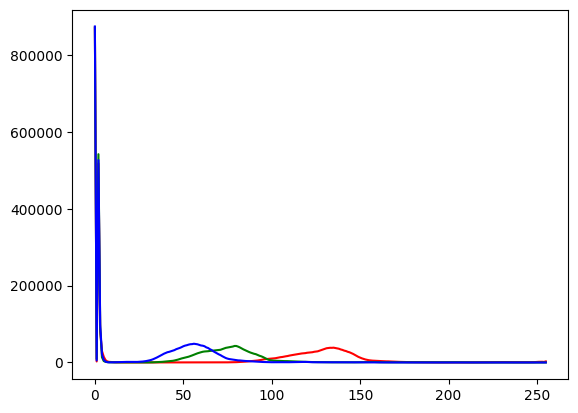

In [89]:
_img = Image.open('dataset/Training_Set/Training/1081.png')
r, g, b = _img.split()
plt.plot(r.histogram(), color='r')
plt.plot(g.histogram(), color='g')
plt.plot(b.histogram(), color='b')
plt.show()

(1424, 2144, 1) (1424, 2144, 1) (1424, 2144, 1)


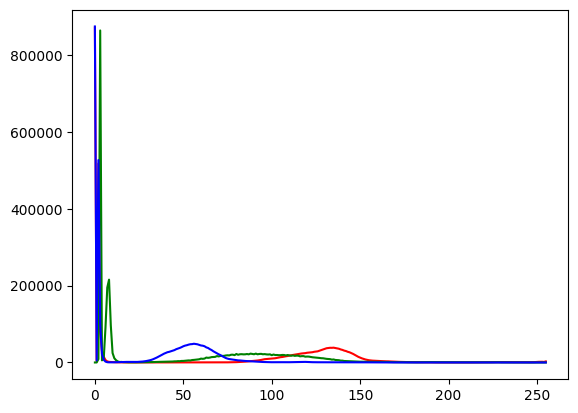

In [90]:
r, g, b = _img.split()
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
g_clahe = clahe.apply(np.asarray(g))
r = np.expand_dims(np.asarray(r), -1)
g_clahe = np.expand_dims(g_clahe, -1)
b = np.expand_dims(np.asarray(b), -1)
print(
    r.shape,
    b.shape,
    b.shape
)
transformed_img = Image.fromarray(np.concatenate([r, g_clahe, b], axis=2))
r, g, b = transformed_img.split()
plt.plot(r.histogram(), color='r')
plt.plot(g.histogram(), color='g')
plt.plot(b.histogram(), color='b')
plt.show()

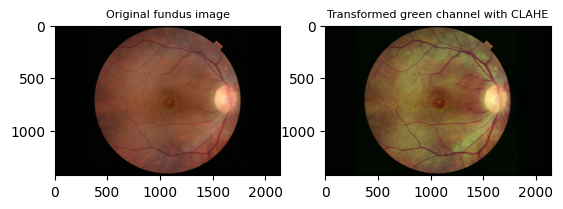

In [91]:
plt.subplot(1, 2, 1)
plt.imshow(_img)
plt.title("Original fundus image", fontsize=8)
plt.subplot(1, 2, 2)
plt.imshow(transformed_img)
plt.title("Transformed green channel with CLAHE", fontsize=8)
plt.show()

## Data Loader

In [146]:
BATCH_SIZE = 32

In [147]:
from PIL import Image
import cv2
import pandas as pd
import numpy as np

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [148]:
df_train.columns

Index(['ID', 'Disease_Risk', 'DR', 'MH', 'ODC', 'TSLN', 'DN', 'MYA', 'ARMD',
       'BRVO', 'ODP', 'ODE', 'LS', 'RS', 'CSR', 'CRS', 'CRVO', 'RPEC', 'AION',
       'AH', 'MS', 'EDN', 'ERM', 'RT', 'MHL', 'PT'],
      dtype='object')

In [149]:
class FundusDataset(Dataset):
    def __init__(
        self,
        image_directory: str,
        csv_file: str | pd.DataFrame,
        transform: transforms.Compose,
        clahe: bool = False
    ):
        self.image_directory = image_directory
        if type(csv_file) == 'str':
            self.df = pd.read_csv(csv_file)
        elif type(csv_file) == pd.DataFrame:
            self.df = csv_file
        # self.df = self.df[["ID", "Disease_Risk", "CRVO"]]
        self.transform = transform
        self.clahe = clahe

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # assume df.columns = ["ID", "Disease_Risk", "disease 1", "disease 2", ...]
        # assume only .png image format
        img_name = os.path.join(self.image_directory, f'{self.df.iloc[idx, 0]}.png')
        image = Image.open(img_name).convert('RGB')

        if self.clahe:
            # apply CLAHE on green channel
            r, g, b = image.split()
            clahe   = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            g_clahe = clahe.apply(np.asarray(g))
            r       = np.expand_dims(np.asarray(r), -1)
            g_clahe = np.expand_dims(g_clahe, -1)
            b       = np.expand_dims(np.asarray(b), -1)
            image   = Image.fromarray(np.concatenate([r, g_clahe, b], axis=2))

        # take disease columns
        labels = self.df.iloc[idx, 2:]

        if self.transform:
            image = self.transform(image)

        return image, np.array(labels, dtype=np.float32)

In [150]:
train_dataset = FundusDataset(
    image_directory="dataset/Training_Set/Training",
    csv_file=df_train,
    transform=transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.transforms.PILToTensor(),
    ]),
    clahe=True
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [151]:
val_dataset = FundusDataset(
    image_directory="dataset/Evaluation_Set/Validation",
    csv_file=df_val,
    transform=transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.transforms.PILToTensor(),
    ]),
    clahe=True
)

val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [152]:
test_dataset = FundusDataset(
    image_directory="dataset/Test_Set/Test",
    csv_file=df_test,
    transform=transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.transforms.PILToTensor(),
    ]),
    clahe=True
)

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [113]:
batch = next(iter(train_loader))
batch[0].shape, batch[1].shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 10]))

In [114]:
for idx, batch in enumerate(train_loader):
    print(idx, "-", batch[1].sum().numpy(), "/", len(batch[1]))
    if idx == 5:
        break

0 - 36.0 / 32
1 - 19.0 / 32
2 - 28.0 / 32
3 - 32.0 / 32
4 - 22.0 / 32
5 - 39.0 / 32


In [115]:
batch = next(iter(val_loader))
batch[0].shape, batch[1].shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 10]))

In [116]:
batch = next(iter(test_loader))
batch[0].shape, batch[1].shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 10]))

## Swin Transformer

https://huggingface.co/docs/transformers/en/model_doc/swin#transformers.SwinForImageClassification

In [166]:
import torch
from torch import nn

from tqdm import tqdm

### Model Definition

In [117]:
from transformers import AutoImageProcessor, SwinForImageClassification

In [118]:
image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
swin_model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
swin_model

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias=True)
                  (value): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
  

In [122]:
ip = image_processor(torch.rand(2, 3, 500, 500), return_tensors="pt")
swin_model.classifier = nn.Identity()
out = swin_model(**ip)
out.logits.shape

It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


torch.Size([2, 768])

In [123]:
sum(p.numel() for p in swin_model.parameters())

27519354

In [124]:
for param in swin_model.parameters():
    param.requires_grad = False

In [153]:
class swin_fc(nn.Module):
    def __init__(self, device, class_num):
        super(swin_fc, self).__init__()
        self.device = device

        self.image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
        self.swin = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
        self.swin.classifier = nn.Identity()
        for param in self.swin.parameters():
            param.requires_grad = False

        self.out = nn.Sequential(
            nn.Linear(in_features=768, out_features=128),
            nn.Linear(in_features=128, out_features=class_num),
            nn.Sigmoid()
        )

    def forward(self, x):
        image_inputs = self.image_processor(images=x, return_tensors="pt").to(self.device)
        img_feats = self.swin(**image_inputs)
        x = torch.relu(img_feats.logits)
        return self.out(x)

In [154]:
diseases, len(diseases)

(Index(['DR', 'MH', 'ODC', 'TSLN', 'DN', 'MYA', 'ARMD', 'BRVO', 'ODP', 'ODE',
        'LS', 'RS', 'CSR', 'CRS', 'CRVO', 'RPEC', 'AION', 'AH', 'MS', 'EDN',
        'ERM', 'RT', 'MHL', 'PT'],
       dtype='object'),
 24)

In [175]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = swin_fc(device=device, class_num=len(diseases))
model.to(device)
print(device)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


cuda:0


### Fitting

Wandb references:
- https://colab.research.google.com/drive/1Durxg9sCra_v4jTLNC_-lGhRRRfT9ed3?usp=sharing#scrollTo=Mpvf38y1rZX6
- [Track Your PyTorch Machine Learning Experiments with Weights & Biases](https://www.youtube.com/watch?v=KESSYZExK44)

In [157]:
!pip install wandb -qU
from google.colab.output import clear
clear()

In [158]:
# Log in to your W&B account
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [178]:
wandb.init(
    project = "Multi-label-fundus-diseases-detection",
    config = {
        "epochs": 15,
        "batch_size": 32,
        "lr": 3e-4
    }
)

config = wandb.config

In [179]:
epochs = config["epochs"]
loss_fn = torch.nn.BCELoss()

In [192]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
                            f1_score, roc_auc_score

class Trainer():
    def __init__(self, model, loss_fn) -> None:
        self.model = model
        self.opt = torch.optim.Adam(self.model.parameters(), lr=config.lr)
        self.sch = torch.optim.lr_scheduler.CosineAnnealingLR(self.opt, 100, 1e-5)
        self.loss_fn = loss_fn
        self.history = {
            'losses': [],
            'val_losses': [],
            'train_acc': [],
            'train_precision': [],
            'train_recall': [],
            'train_f1': [],
            'val_acc': [],
            'val_precision': [],
            'val_recall': [],
            'val_f1': [],
        }

    def __trainstep(self, train_loader: DataLoader, verbose: int, epoch, EPOCHS):
        self.model.train()
        train_loss = 0
        y_true = []
        y_pred = []
        batches = len(train_loader)
        if verbose == 1:
            tqdm_iterator = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{EPOCHS}', position=0)
        for iter, (x,y) in enumerate(tqdm_iterator, 1):
            x, y = x.to(device), y.to(device)
            self.opt.zero_grad()

            pred = self.model(x).squeeze(-1)
            loss = self.loss_fn(pred, y.float())
            train_loss += loss.item()
            tqdm_iterator.set_description(f'Epoch {epoch + 1}/{EPOCHS} | Loss: {train_loss / iter:.4f}')

            loss.backward()
            self.opt.step()

            y_true.extend(y.cpu().numpy())
            y_pred.extend((pred > 0.5).cpu().numpy())

            train_acc = accuracy_score(y_true, y_pred, )
            train_recall = recall_score(y_true, y_pred, zero_division=0, average='samples')
            train_precision = precision_score(y_true, y_pred, zero_division=0, average='samples')
            train_f1 = f1_score(y_true, y_pred, zero_division=0, average='samples')
            tqdm_iterator.set_postfix(
                train_accuracy=train_acc,
                train_recall=train_recall,
                train_precision=train_precision,
                train_f1=train_f1,
            )

        train_loss /= batches
        self.history['losses'].append(train_loss)
        self.history['train_acc'].append(train_acc)
        self.history['train_recall'].append(train_recall)
        self.history['train_precision'].append(train_precision)
        self.history['train_f1'].append(train_f1)

        return train_loss, train_acc, train_recall, train_precision, train_f1

    def __evalstep(self, val_loader: DataLoader, verbose: int, epoch, EPOCHS):
        self.model.eval()
        val_loss = 0
        y_true = []
        y_pred = []
        batches = len(val_loader)
        if verbose == 1:
            tqdm_val_iterator = tqdm(val_loader, desc=f'Epoch {epoch + 1}/{EPOCHS}', position=0)
        with torch.no_grad():
            for iter, (x, y) in enumerate(tqdm_val_iterator, 1):
                x, y = x.to(device), y.to(device)
                pred = self.model(x).squeeze(-1)
                loss = self.loss_fn(pred, y.float())
                val_loss += loss.item()
                tqdm_val_iterator.set_description(f'Epoch {epoch + 1}/{EPOCHS} | Loss: {val_loss / iter:.4f}')

                y_true.extend(y.cpu().numpy())
                y_pred.extend((pred > 0.5).cpu().numpy())

                val_acc = accuracy_score(y_true, y_pred, )
                val_recall = recall_score(y_true, y_pred, zero_division=0, average='samples')
                val_precision = precision_score(y_true, y_pred, zero_division=0, average='samples')
                val_f1 = f1_score(y_true, y_pred, zero_division=0, average='samples')
                tqdm_val_iterator.set_postfix(
                    val_accuracy=val_acc,
                    val_recall=val_recall,
                    val_precision=val_precision,
                    val_f1=val_f1,
                )
        val_loss /= batches
        self.history['val_losses'].append(val_loss)
        self.history['val_acc'].append(val_acc)
        self.history['val_recall'].append(val_recall)
        self.history['val_precision'].append(val_precision)
        self.history['val_f1'].append(val_f1)

        return val_loss, val_acc, val_recall, val_precision, val_f1

    def fit(self, train_loader: DataLoader, val_loader: DataLoader, epochs: int, verbose: int, patience: int):
        assert verbose in [0, 1], 'verbose must be either 0 or 1'
        best_loss = float('inf')
        best_model = None
        max_patience = patience
        for i in range(epochs):
            train_loss, train_acc, train_recall, train_precision, train_f1 = self.__trainstep(
                train_loader,
                verbose,
                epoch=i,
                EPOCHS=epochs
            )
            val_loss, val_acc, val_recall, val_precision, val_f1 = self.__evalstep(
                val_loader,
                verbose,
                epoch=i,
                EPOCHS=epochs
            )
            metrics = {
                "train/train_loss": train_loss,
                "train/train_acc": train_acc,
                "train/train_recall": train_recall,
                "train/train_precision": train_precision,
                "train/train_f1": train_f1,
                "train/epoch": i,
            }
            val_metrics = {
                "val/val_loss": val_loss,
                "val/val_acc": val_acc,
                "val/val_recall": val_recall,
                "val/val_precision": val_precision,
                "val/val_f1": val_f1,
            }
            wandb.log({**metrics, **val_metrics})
            if self.history['val_losses'][-1] < best_loss:
                best_loss = self.history['val_losses'][-1]
                best_model = self.model.state_dict()
                patience = max_patience
            else:
                patience -= 1
                if patience == 0:
                    break
            if self.sch:
                self.sch.step()
        self.model.load_state_dict(best_model)
        if verbose == 1:
            print(f'\nbest loss:', best_loss)

    def predict(self, test_loader: DataLoader):
        self.model.eval()
        self.model = self.model.to(self.device)
        test_preds = []
        with torch.no_grad():
            for x, _ in test_loader:
                x = x.to(self.device)
                pred = self.model(x).squeeze(-1)
                test_preds.append(pred.cpu().numpy())
        test_preds = np.concatenate(test_preds, axis=0)
        # wandb.summary['test_accuracy']
        return test_preds

In [181]:
trainer = Trainer(model, loss_fn)
trainer.fit(train_loader, val_loader, epochs, verbose=1, patience=5)
wandb.finish()

Epoch 1/15 | Loss: 0.1885: 100%|██████████| 60/60 [07:30<00:00,  7.51s/it, train_accuracy=0.217, train_f1=0.0013, train_precision=0.00156, train_recall=0.00122]
Epoch 1/15 | Loss: 0.1466: 100%|██████████| 20/20 [02:05<00:00,  6.25s/it, val_accuracy=0.231, val_f1=0, val_precision=0, val_recall=0]
Epoch 2/15 | Loss: 0.1444: 100%|██████████| 60/60 [06:21<00:00,  6.36s/it, train_accuracy=0.222, train_f1=0.00486, train_precision=0.00521, train_recall=0.00469]
Epoch 2/15 | Loss: 0.1388: 100%|██████████| 20/20 [02:10<00:00,  6.51s/it, val_accuracy=0.247, val_f1=0.0167, val_precision=0.0172, val_recall=0.0164]
Epoch 3/15 | Loss: 0.1378: 100%|██████████| 60/60 [06:46<00:00,  6.77s/it, train_accuracy=0.261, train_f1=0.0546, train_precision=0.0609, train_recall=0.0517]
Epoch 3/15 | Loss: 0.1334: 100%|██████████| 20/20 [02:03<00:00,  6.20s/it, val_accuracy=0.322, val_f1=0.118, val_precision=0.134, val_recall=0.111]
Epoch 4/15 | Loss: 0.1324: 100%|██████████| 60/60 [06:36<00:00,  6.61s/it, train_ac


best loss: 0.11198513023555279


train/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train/train_acc,▁▁▃▅▆▆▆▇▇▇▇████
train/train_f1,▁▁▃▄▅▅▆▇▇▇▇▇███
train/train_loss,█▄▄▃▃▂▂▂▂▂▂▁▁▁▁
train/train_precision,▁▁▃▄▅▅▆▆▇▇▇▇███
train/train_recall,▁▁▃▄▅▅▆▇▇▇▇████
val/val_acc,▁▂▅▅▆▆▇▆▇▇█▇▇▇█
val/val_f1,▁▂▅▅▆▆▇▆▇▇█▇▇▇█
val/val_loss,█▆▅▄▄▃▃▂▂▂▂▂▁▁▁
val/val_precision,▁▂▅▅▆▆▇▆█▇█▇▇▇█
val/val_recall,▁▂▅▅▆▅▇▆▇▇█▇▇▇█


I am stopping at 15 epochs but the trend looks good

### Save Model

In [182]:
model_name = "Fundus-24_diseases-CLAHE-Swin_Transformer.pth"
model.to(torch.device("cpu"))
torch.save(model.state_dict(), model_name)
torch.save(model.state_dict(), os.path.join(PROJECT_DIR, "models", model_name))

### Training Progress

In [183]:
import matplotlib.pyplot as plt

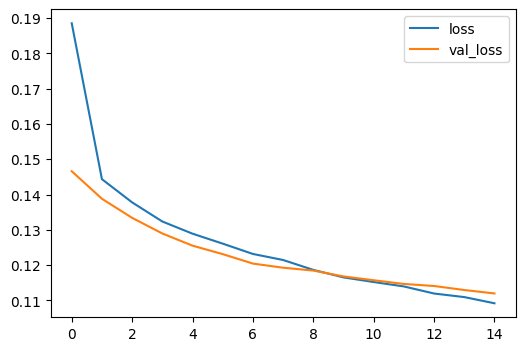

In [187]:
losses = trainer.history['losses']
val_losses = trainer.history['val_losses']
plt.figure(figsize=(6, 4))
plt.plot(range(len(losses)), losses)
plt.plot(range(len(val_losses)), val_losses)
plt.legend(['loss', 'val_loss'], loc = 'upper right')
plt.show()

In [185]:
losses = trainer.history['losses']
val_losses = trainer.history['val_losses']
acc = trainer.history['train_acc']
val_acc = trainer.history['val_acc']
recall = trainer.history['train_recall']
val_recall = trainer.history['val_recall']
precision = trainer.history['train_precision']
val_precision = trainer.history['val_precision']
f1 = trainer.history['train_f1']
val_f1 = trainer.history['val_f1']

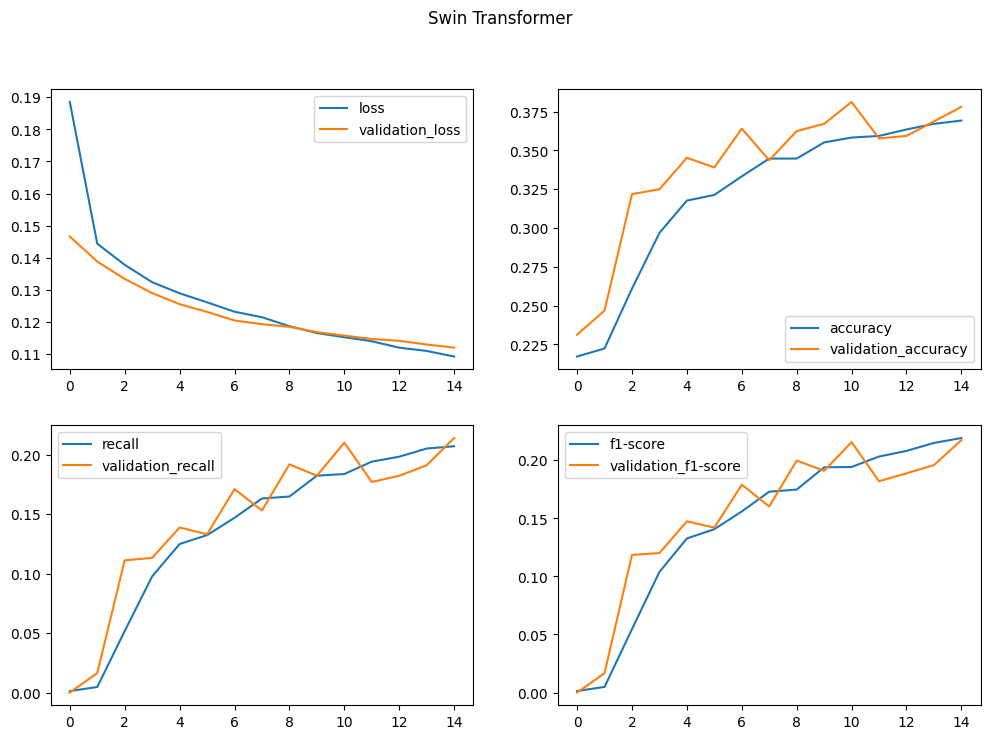

In [186]:
plt.figure(figsize=(12, 8))
for idx, hist in enumerate(
    [
        (losses, val_losses, "loss"),
        (acc, val_acc, "accuracy"),
        (recall, val_recall, "recall"),
        (f1, val_f1, "f1-score")
    ],
    1
):
    plt.subplot(2, 2, idx)
    train_metric = hist[0]
    val_metric = hist[1]
    metric = hist[2]
    plt.plot(range(len(train_metric)), train_metric)
    plt.plot(range(len(val_metric)), val_metric)
    plt.legend([f'{metric}', f'validation_{metric}'], loc='best')
plt.suptitle("Swin Transformer")
plt.show()